In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from helpers import *
from ourHelpers import *
from models import *
from mask_to_submission import *
from submission_to_mask import *

In [ ]:
X, Y = load_training_dataset()
plt.imshow(concatenate_images(X[4], Y[4]))
plt.show()

# Load the model

The model is saved inside `model_dir` so the training can be stop at anytime and restart form the same directory

In [ ]:
config = tf.estimator.RunConfig()
config._save_summary_steps = 20
model_params = {"learning_rate": 0.01}
my_estimator = tf.estimator.Estimator(model_fn=baseline_model_fn, model_dir="../model_dir",
                                      params=model_params,config=config)

# Training
Start or continue training from the model saved at `model_dir`

In [ ]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": X},
    y=Y,
    batch_size=10,
    queue_capacity = 100,  # Important to avoid OOM Error
    num_epochs=None,
    shuffle=True)

#Train
my_estimator.train(input_fn=train_input_fn, steps=500)

## Prediction on the training set

In [5]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": X},
    num_epochs=1,
    batch_size= 10,
    queue_capacity = 10,
    shuffle=False)

predictions = [p for p in my_estimator.predict(input_fn=predict_input_fn)]

(?, 400, 400)
INFO:tensorflow:Restoring parameters from ../model_dir\model.ckpt-10001


In [6]:
pred = np.array([p>0.5 for p in predictions])
Y_bin = np.array([y>0.5 for y in Y])
sk_mean_F1_score(Y_bin, pred)

0.63263951665128171

In [7]:
def sk_mean_F1_score2(prediction, groundtruth):
    return f1_score(np.reshape(prediction, [-1]), np.reshape(groundtruth, [-1]), average='macro')

In [8]:
sk_mean_F1_score2(Y_bin, pred)

0.64872731053727317

8044
(400, 400)


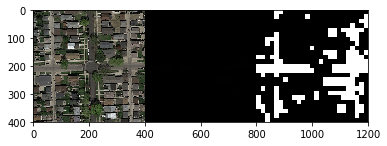

12893
(400, 400)


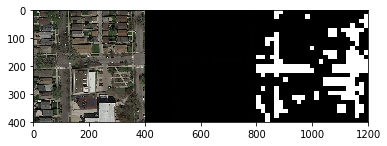

20728
(400, 400)


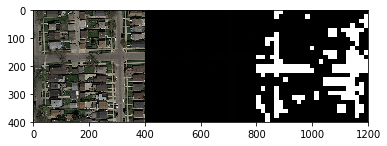

12445
(400, 400)


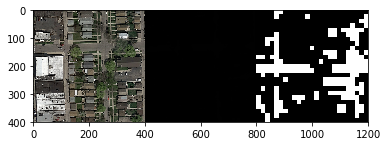

5241
(400, 400)


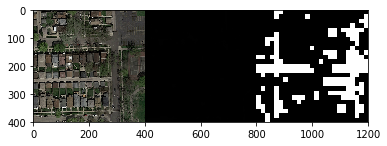

13899
(400, 400)


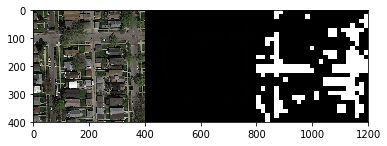

8383
(400, 400)


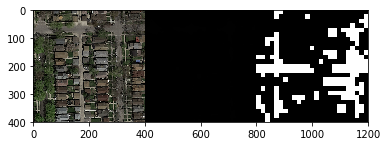

10044
(400, 400)


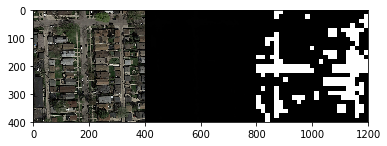

11287
(400, 400)


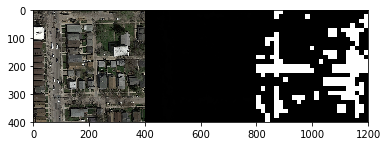

10037
(400, 400)


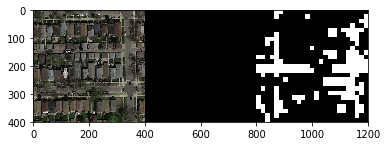

5344
(400, 400)


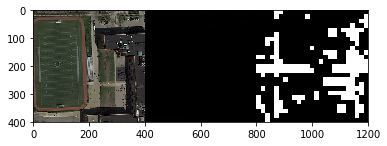

6391
(400, 400)


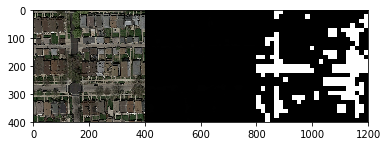

9575
(400, 400)


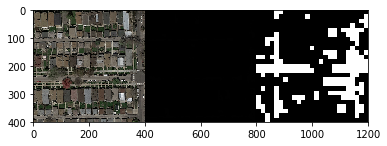

7058
(400, 400)


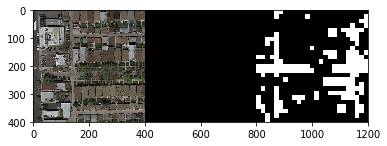

17067
(400, 400)


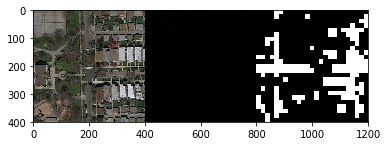

9780
(400, 400)


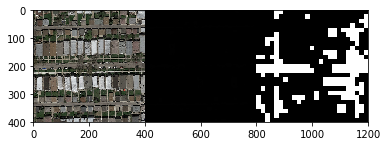

3822
(400, 400)


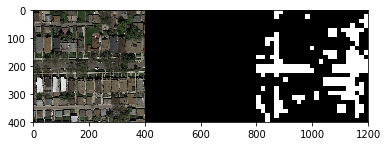

7690
(400, 400)


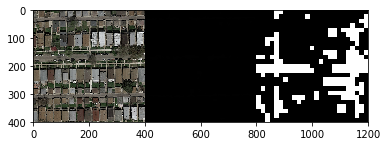

6791
(400, 400)


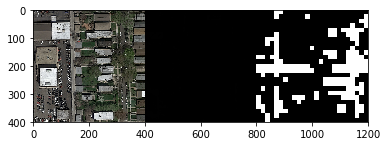

3340
(400, 400)


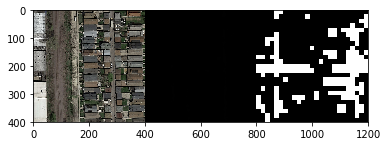

4863
(400, 400)


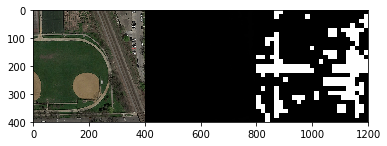

4376
(400, 400)


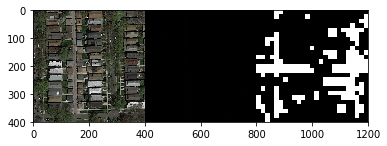

17299
(400, 400)


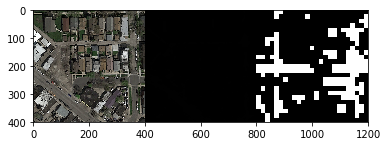

5421
(400, 400)


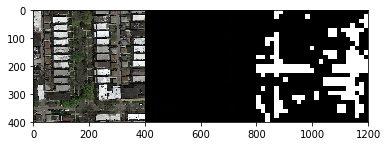

7787
(400, 400)


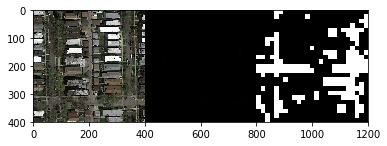

17464
(400, 400)


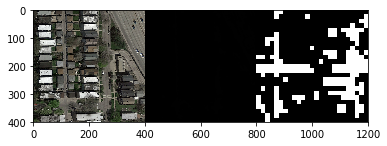

21106
(400, 400)


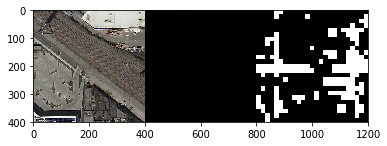

26183
(400, 400)


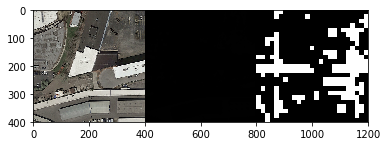

15574
(400, 400)


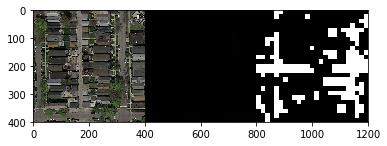

4910
(400, 400)


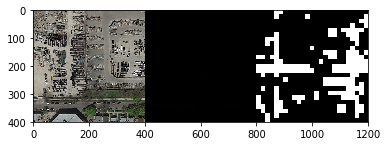

30320
(400, 400)


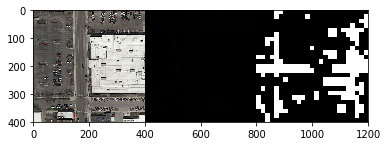

28418
(400, 400)


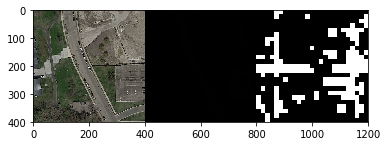

48213
(400, 400)


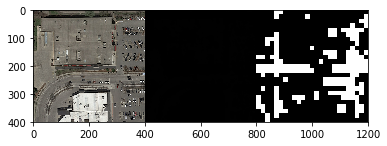

12485
(400, 400)


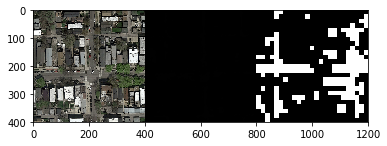

15322
(400, 400)


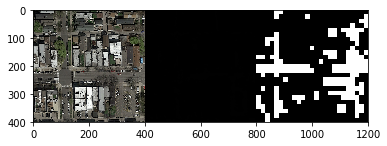

17147
(400, 400)


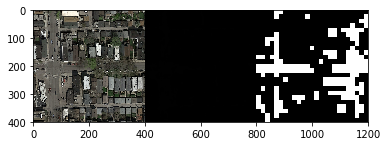

9701
(400, 400)


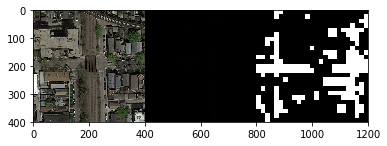

9964
(400, 400)


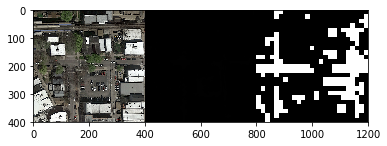

5289
(400, 400)


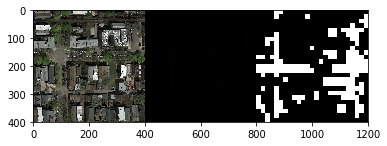

4109
(400, 400)


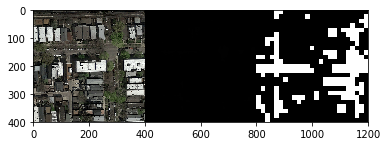

13746
(400, 400)


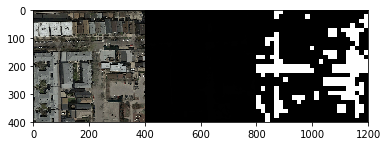

13879
(400, 400)


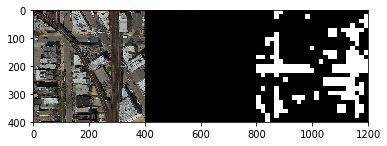

12323
(400, 400)


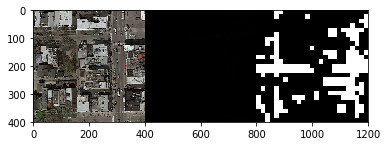

7231
(400, 400)


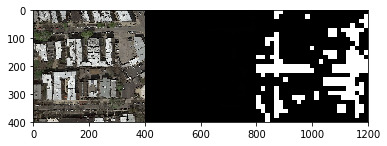

3619
(400, 400)


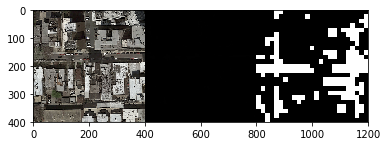

7366
(400, 400)


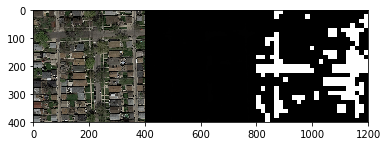

12677
(400, 400)


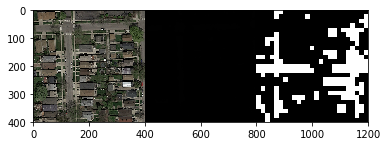

17895
(400, 400)


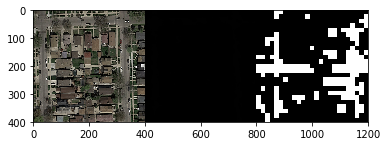

11937
(400, 400)


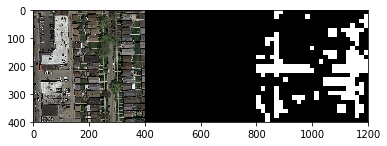

11904
(400, 400)


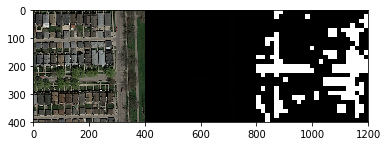

6889
(400, 400)


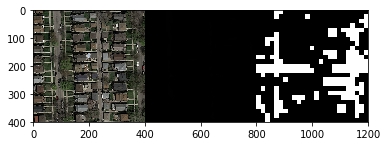

5626
(400, 400)


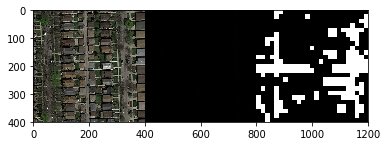

5976
(400, 400)


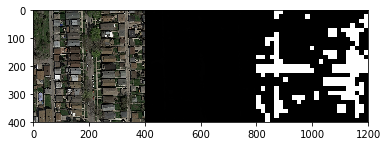

14607
(400, 400)


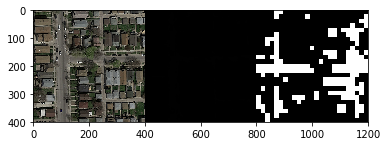

7227
(400, 400)


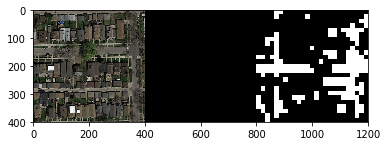

4939
(400, 400)


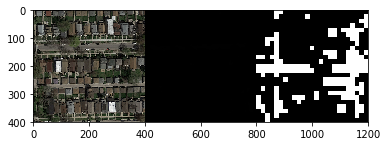

6613
(400, 400)


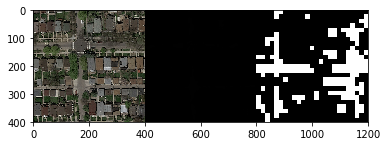

5623
(400, 400)


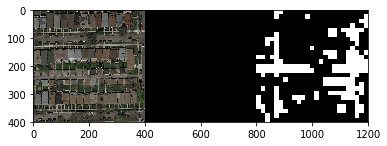

7344
(400, 400)


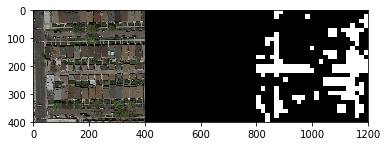

12601
(400, 400)


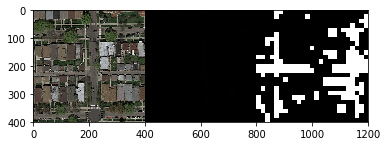

8473
(400, 400)


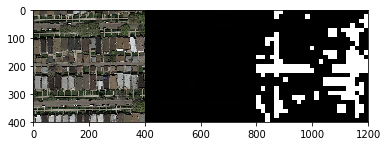

9804
(400, 400)


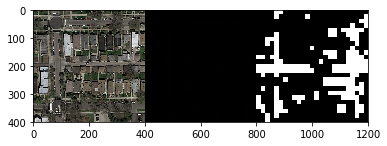

12722
(400, 400)


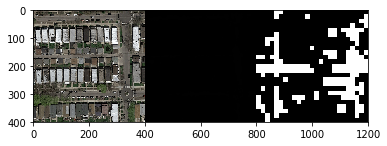

26444
(400, 400)


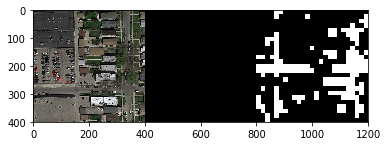

25883
(400, 400)


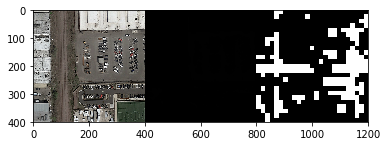

10472
(400, 400)


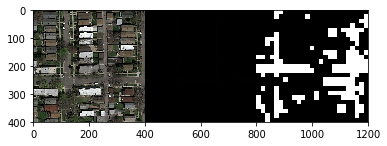

8633
(400, 400)


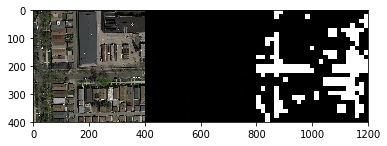

16506
(400, 400)


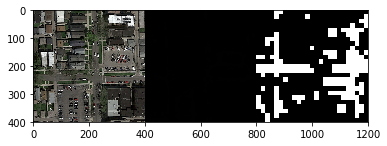

22992
(400, 400)


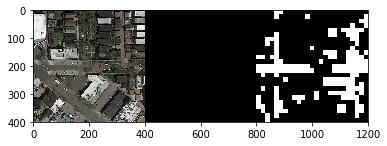

7745
(400, 400)


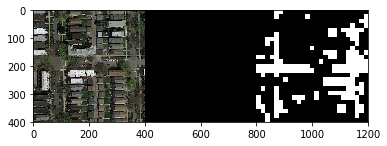

6093
(400, 400)


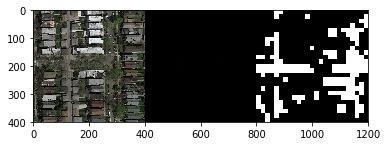

33038
(400, 400)


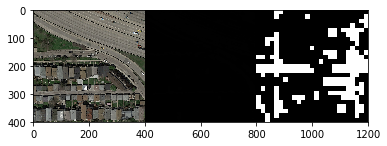

25157
(400, 400)


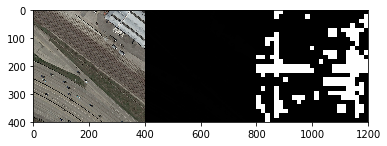

9342
(400, 400)


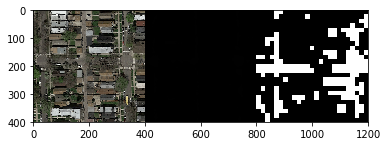

22485
(400, 400)


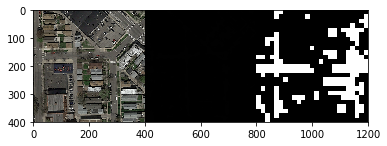

12806
(400, 400)


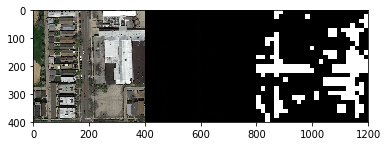

9944
(400, 400)


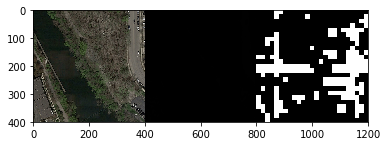

37925
(400, 400)


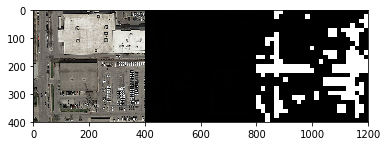

10193
(400, 400)


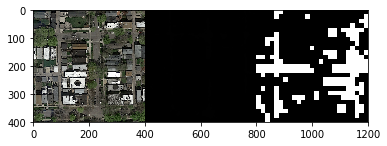

5820
(400, 400)


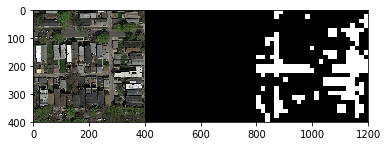

12912
(400, 400)


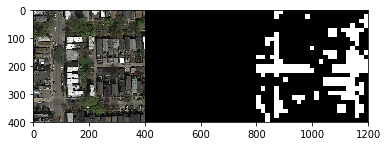

12595
(400, 400)


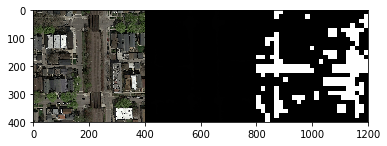

17459
(400, 400)


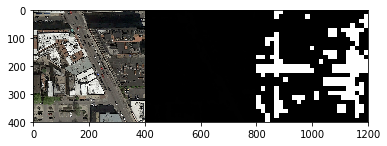

8763
(400, 400)


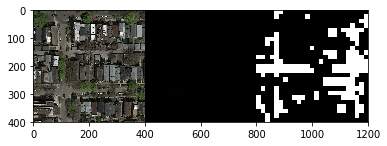

6518
(400, 400)


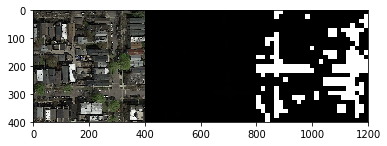

6161
(400, 400)


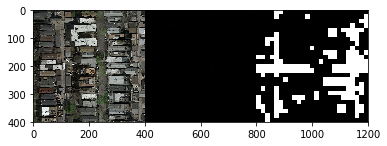

8912
(400, 400)


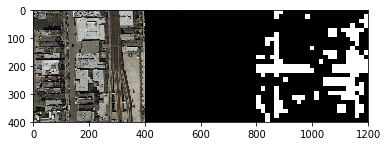

10884
(400, 400)


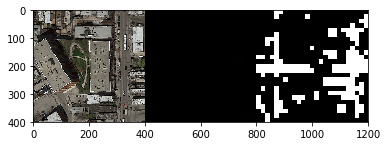

3459
(400, 400)


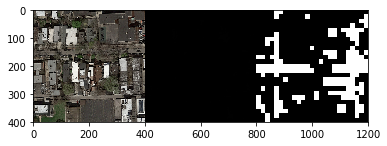

2307
(400, 400)


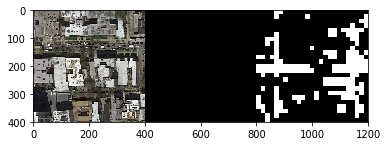

10623
(400, 400)


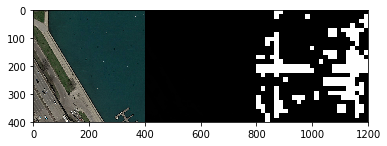

87
(400, 400)


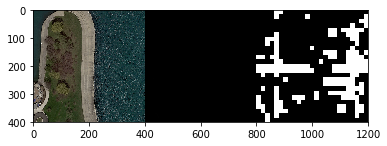

18102
(400, 400)


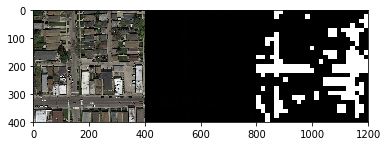

20319
(400, 400)


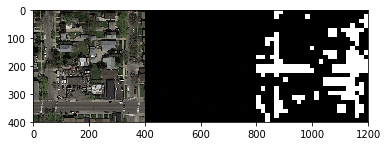

15878
(400, 400)


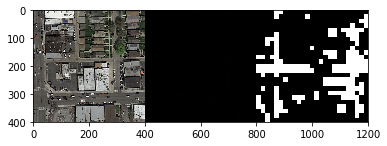

18178
(400, 400)


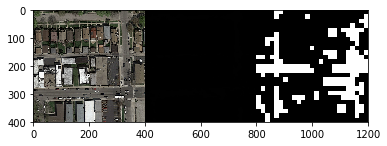

30870
(400, 400)


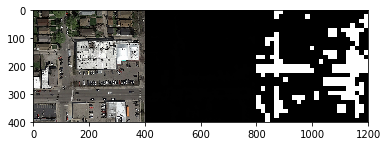

20984
(400, 400)


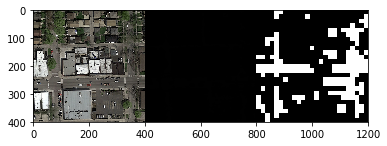

21645
(400, 400)


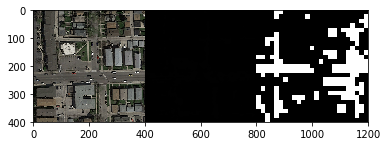

41400
(400, 400)


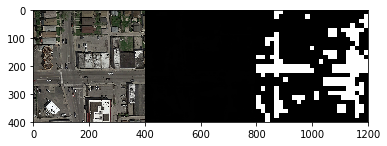

In [32]:
for i, p in enumerate(predictions):
    print(np.sum(p>0.5))
    plt.imshow(concatenate_images(X[i], np.array(p>0.5)))
    #plt.imshow(p)
    plt.show()

# Reference:

How to create your own [estimator](https://www.tensorflow.org/extend/estimators) 